In [44]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [45]:
# Define the tickers and date range
tickers = ["SPY", "SPDN"]
start_date = "2020-03-01"
end_date = "2020-04-29"

In [46]:
# Download data for both tickers
data = yf.download(tickers, start=start_date, end=end_date, group_by="ticker", progress=False)

# Extract closing prices
spy_data = data["SPY"]["Close"] if "SPY" in data else data["Close"]["SPY"]
spdn_data = data["SPDN"]["Close"] if "SPDN" in data else data["Close"]["SPDN"]

In [47]:
# Calculate daily returns
spy_returns = spy_data.pct_change()
spdn_returns = spdn_data.pct_change()

# Simulate optimal trading strategy with Stop Limit order prices
transactions = []
current_stock = None

for date, spy_price, spdn_price, spy_ret, spdn_ret in zip(
    spy_data.index, spy_data, spdn_data, spy_returns, spdn_returns
):
    if spy_ret > spdn_ret:  # Prefer SPY
        if current_stock != "SPY":
            transactions.append({
                "Date": date,
                "Action": "Buy",
                "Stock": "SPY",
                "Price": spy_price * 1.01  # 1% above the current price for Stop Limit Buy
            })
            if current_stock:
                transactions[-2]["Action"] = "Sell"
                transactions[-2]["Price"] = spy_price * 0.99  # 1% below the current price for Stop Limit Sell
            current_stock = "SPY"
    else:  # Prefer SPDN
        if current_stock != "SPDN":
            transactions.append({
                "Date": date,
                "Action": "Buy",
                "Stock": "SPDN",
                "Price": spdn_price * 1.01  # 1% above the current price for Stop Limit Buy
            })
            if current_stock:
                transactions[-2]["Action"] = "Sell"
                transactions[-2]["Price"] = spdn_price * 0.99  # 1% below the current price for Stop Limit Sell
            current_stock = "SPDN"

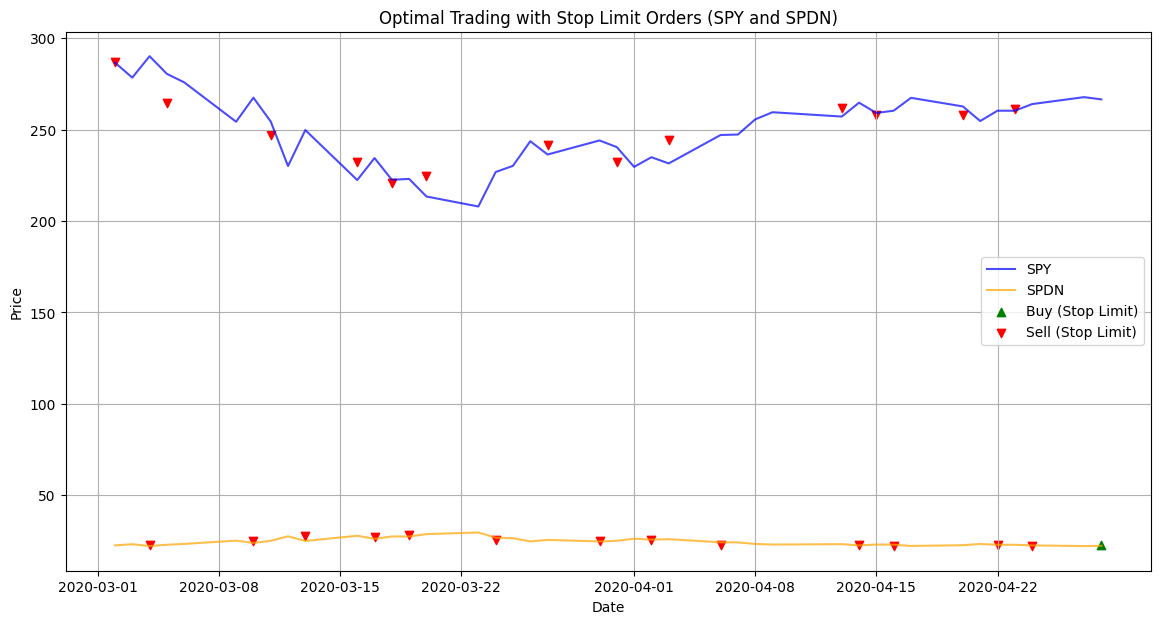

In [48]:
# Convert transactions into DataFrame for easy plotting
transactions_df = pd.DataFrame(transactions)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(spy_data.index, spy_data, label="SPY", color="blue", alpha=0.7)
plt.plot(spdn_data.index, spdn_data, label="SPDN", color="orange", alpha=0.7)

# Buy signals
buy_signals = transactions_df[transactions_df["Action"] == "Buy"]
plt.scatter(buy_signals["Date"], buy_signals["Price"], marker="^", color="green", label="Buy (Stop Limit)")

# Sell signals
sell_signals = transactions_df[transactions_df["Action"] == "Sell"]
plt.scatter(sell_signals["Date"], sell_signals["Price"], marker="v", color="red", label="Sell (Stop Limit)")

# Graph details
plt.title("Optimal Trading with Stop Limit Orders (SPY and SPDN)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

In [49]:
print(transactions_df)


         Date Action Stock       Price
0  2020-03-02   Sell  SPDN  287.159518
1  2020-03-04   Sell   SPY   22.764307
2  2020-03-05   Sell  SPDN  264.727293
3  2020-03-10   Sell   SPY   24.874726
4  2020-03-11   Sell  SPDN  247.196229
5  2020-03-13   Sell   SPY   27.629763
6  2020-03-16   Sell  SPDN  232.033304
7  2020-03-17   Sell   SPY   27.258891
8  2020-03-18   Sell  SPDN  220.752854
9  2020-03-19   Sell   SPY   28.521612
10 2020-03-20   Sell  SPDN  224.488346
11 2020-03-24   Sell   SPY   25.374103
12 2020-03-27   Sell  SPDN  241.568459
13 2020-03-30   Sell   SPY   24.905854
14 2020-03-31   Sell  SPDN  232.502156
15 2020-04-02   Sell   SPY   25.789354
16 2020-04-03   Sell  SPDN  244.532085
17 2020-04-06   Sell   SPY   23.085840
18 2020-04-13   Sell  SPDN  262.009234
19 2020-04-14   Sell   SPY   22.873804
20 2020-04-15   Sell  SPDN  257.679253
21 2020-04-16   Sell   SPY   22.520406
22 2020-04-20   Sell  SPDN  257.679253
23 2020-04-22   Sell   SPY   22.750113
24 2020-04-23   Sell  SPD

In [50]:
print(transactions_df.head())


        Date Action Stock       Price
0 2020-03-02   Sell  SPDN  287.159518
1 2020-03-04   Sell   SPY   22.764307
2 2020-03-05   Sell  SPDN  264.727293
3 2020-03-10   Sell   SPY   24.874726
4 2020-03-11   Sell  SPDN  247.196229
